In [2]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

train_df = pd.read_csv("https://storage.googleapis.com/kaggle-competitions-data/kaggle/5407/train.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1528096567&Signature=kkMTTBCgUIArj3bzZf1b%2FVDzL8TmYoKQ%2Ft%2F1i50vu4vfICWTiytExYNVqyr%2BANBvD0m6LW7DuCf5z3UfxIzemblU6jm7JGJ7NHD3Px0mrlFJB7FGJjh0BAgZmtscB4sxIi%2BoQz5BxGwWBX7ZGGfzjY3cxwjCHr1wCh6ZdVyiOYsDtf5GjdViCGOSz8g8WQj%2B%2F11PnYUcIOGAZiFeZshTXv%2Fn5KapDCjeDQ67PCiGFK0eSfvtEfkmx23Ovcbdy9D9z%2FH0W2OKVnYr0xT6XO4S2m3HaA%2BW4tV8RvEHEq4NgPLFcdyUQR8Iepn9g78Bex46BjW%2BA8vyjcJaykf6W6Ne9g%3D%3D")
test_df = pd.read_csv("https://storage.googleapis.com/kaggle-competitions-data/kaggle/5407/test.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1528096640&Signature=X6nHvyCS1XANFRoDPSGj3kEVJg2GA0poVeCYtk1POpPpXuGm3t%2BtqKhvjMlKrdqcJL4HA%2BCd9F0JOZCHDAPcD0VWi5wPMf288dxtU6%2BsoHuU9qY78wz84U%2B1zuESWJ%2FvhLklXx8%2B%2FCPADpk%2BEGPjHe3UMNzxruMiS7hYOZ%2ForydIr4PA78j9bXS83Vnq8dcwX1XVomcTjL4DRywAYRY39dK%2FwwZLaUvz5iERMH3DvDheLbc0O%2BG41caaq0ZLFFrob3SwATj751ubE1M1GaZ%2FF3fi8r0%2B5AA7gA6GN%2F4kABBW1qafCSlnrAz2ZWPUkceXFcsvwrqNJtc3PlxeSCTSsg%3D%3D")

In [39]:
"""
corr이 높은 순으로 넣어보자. 
"""
train_df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [41]:
train_df['OverallQual'].isnull().sum()

0

In [227]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
"""
data exploration 을 해야 하는데, 
- numerical categorical 분류하고, 
- correlation matrix를 뽑아보자. 
"""
def preprocessingX(input_df):
    X = input_df[['OverallQual', 'OverallCond', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath',
                  'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'YrSold',
                  'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea'
             ]]
    for col in ['SaleCondition', 'SaleType', 'Street', 'BldgType', 'Condition1', 'ExterQual', 'ExterCond',
                'Functional'
               ]:
        X = X.join(pd.get_dummies(input_df[col], prefix=col))
    X = X.fillna(X.mean())
    X = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=X.columns)
    return X
X = preprocessingX(train_df)
notX = train_df[ list(set(train_df.columns) - set(X.columns)) ]
Y = np.log(train_df['SalePrice'])


#train_x, test_x, train_y, test_y = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=42)

models = {
    #'linreg': GridSearchCV( LinearRegression(), {}),
    #'Ridge': GridSearchCV(Ridge(), {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0]}),
    #'Lasso': GridSearchCV(Lasso(), {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0]}),
    'ElasticNet': GridSearchCV(ElasticNet(), {'alpha':[0.001, 0.01, 0.1, 0.5, 1.0]}, cv=3),
    'rf1': GridSearchCV(RandomForestRegressor(), {'n_estimators':[2, 5]}, cv=3),
    'rf2': GridSearchCV(RandomForestRegressor(), {'n_estimators':[50]}, cv=3)
}
"""
    'MLPRegressor': GridSearchCV(MLPRegressor(), {'hidden_layer_sizes':[[10, 20, 10], [10, 10, 10, 10],
                                                                        #[32, 128, 256, 128, 32, 2]
                                                                       ],
                                              'activation':['relu', 'logistic'], 'solver':['adam']
                                             }),


"""


for k, m in models.items():
    m.fit(X, Y)
    print(k)
    print("train score: {:.3f}".format(m.score(X, Y)))
    print("mse: {}".format(mean_squared_error(Y, m.predict(X))))
    print("----------")
# notX.corr()['SalePrice'].sort_values(ascending=False)


best_model = sorted([m for k, m in models.items()], key=lambda m: m.score(X,Y))[-1]
#print(best_model)

for r in np.linspace(0.0, 1.0, 10):
    y_pred = models['rf1'].predict(X)*r + models['rf2'].predict(X)*(1-r)
    print(mean_squared_error(Y, y_pred))



pd.DataFrame({'Id':test_df['Id'], 
              'SalePrice':np.exp(best_model.predict(preprocessingX(test_df)))}).to_csv(
    "180601_houseprice.csv", index=False)
print("complete")


ElasticNet
train score: 0.869
mse: 0.020858482391253697
----------
rf1
train score: 0.964
mse: 0.005712310119705426
----------
rf2
train score: 0.980
mse: 0.00313364823227462
----------
0.00313364823227
0.00310306751573
0.00315176147519
0.00327973011066
0.00348697342214
0.00377349140963
0.00413928407313
0.00458435141265
0.00510869342817
0.00571231011971
complete


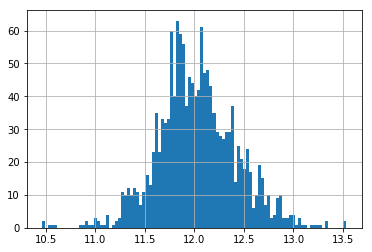

In [238]:
"""
그런데, 단순히 이렇게 normalization하는 것만으로 의미가 있나?
- 차이가 있다면, 차이가 더 있도록 만들고, 차이가 없다면 차이를 줄이도록 변수를 조절하는 것이 중요함. 
- normalization을 하는 것은 이 차이를 두드러지게 만들기 위함. 
"""
import seaborn as sns 

train_df['SalePrice'].apply(lambda x: np.log(x)).hist(bins=100)
plt.show()

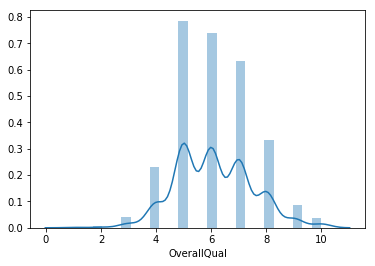

In [241]:
import seaborn as sns 

sns.distplot(train_df['OverallQual'])
plt.show()

In [182]:
test_df['HouseStyle'].isnull().sum()

0

In [149]:
notX['SaleType'].isnull().sum()

0

In [ ]:
pd.concat()